In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [1]:
pip install pycaret

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')
print(df.head())


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
# ---------------------------------------------
# a) Descriptive Statistics
# ---------------------------------------------

# Basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Descriptive statistics for numerical features
print("\nDescriptive Statistics (Numerical Features):")
print(df.describe())

# Descriptive statistics for categorical features
print("\nDescriptive Statistics (Categorical Features):")
print(df.describe(include='object'))

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri

In [5]:
### Prepare Data
#### Data Cleaning

# Remove unnamed columns (if any)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Check for and remove null values
print("Null values in dataset before removal:")
print(df.isnull().sum())
df = df.dropna()
print("Null values in dataset after removal:")
print(df.isnull().sum())

Null values in dataset before removal:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Null values in datas

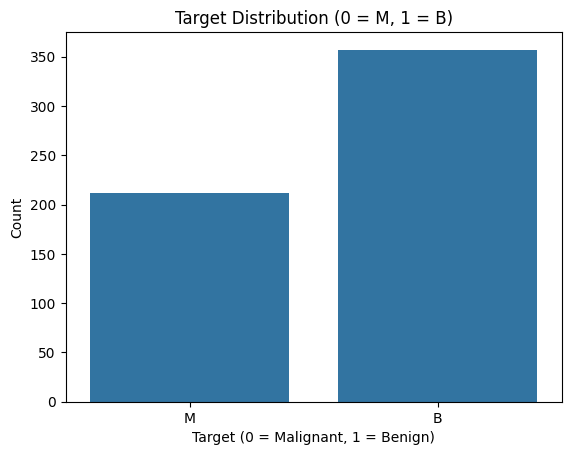

In [6]:
# Target distribution
sns.countplot(x='diagnosis', data=df)
plt.title("Target Distribution (0 = M, 1 = B)")
plt.xlabel("Target (0 = Malignant, 1 = Benign)")
plt.ylabel("Count")
plt.show()



Generating Histograms for Numerical Features...


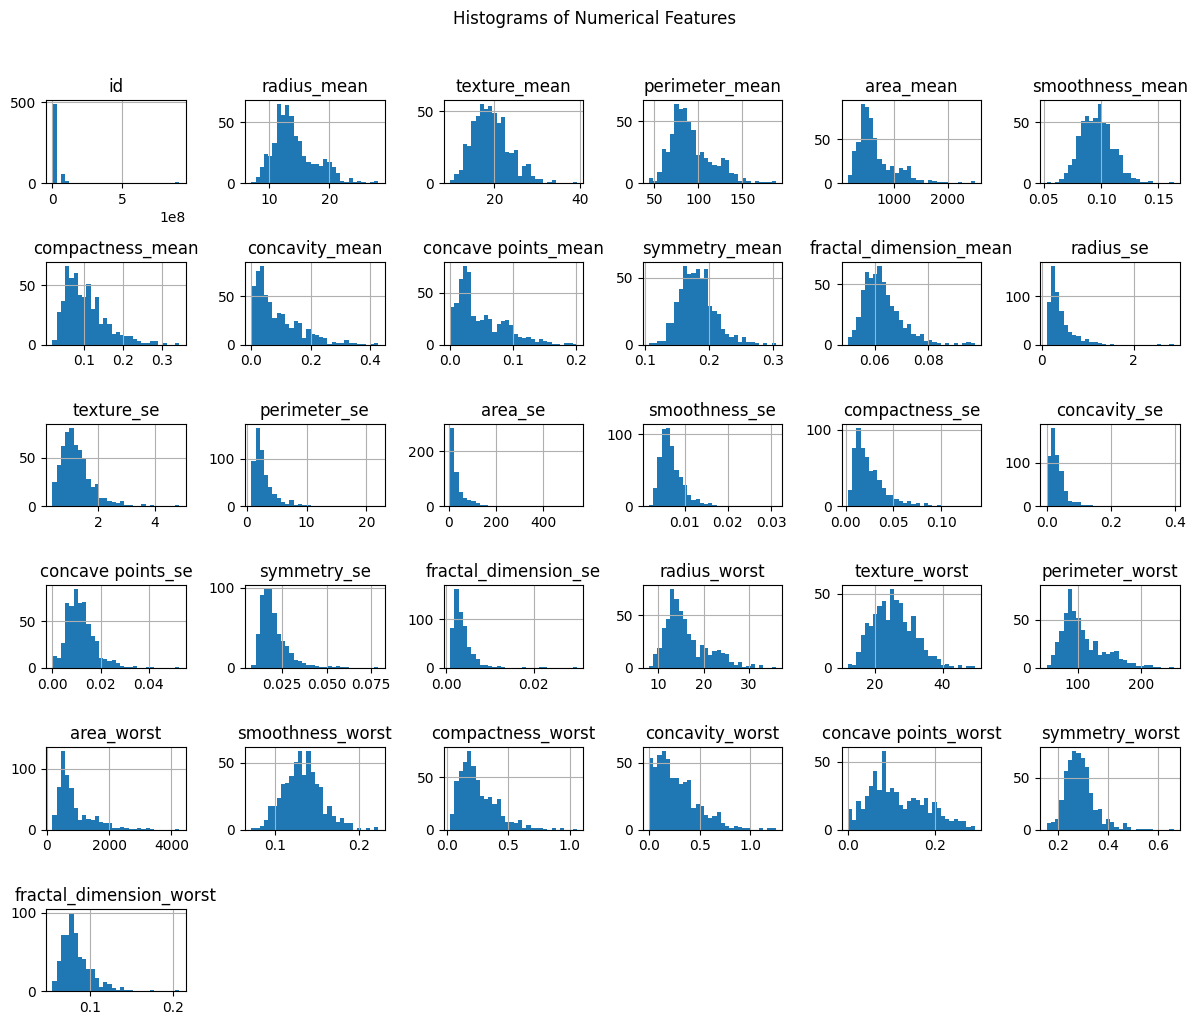

In [7]:
# Histogram for all numerical features
print("\nGenerating Histograms for Numerical Features...")
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.savefig("histograms.png")
plt.show()


In [8]:
# Convert the 'diagnosis' column to numeric (0 = Malignant, 1 = Benign)
if 'diagnosis' in df.columns:
    print("Converting 'diagnosis' column to numeric...")
    df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})


Converting 'diagnosis' column to numeric...


Generating Correlation Heatmap...


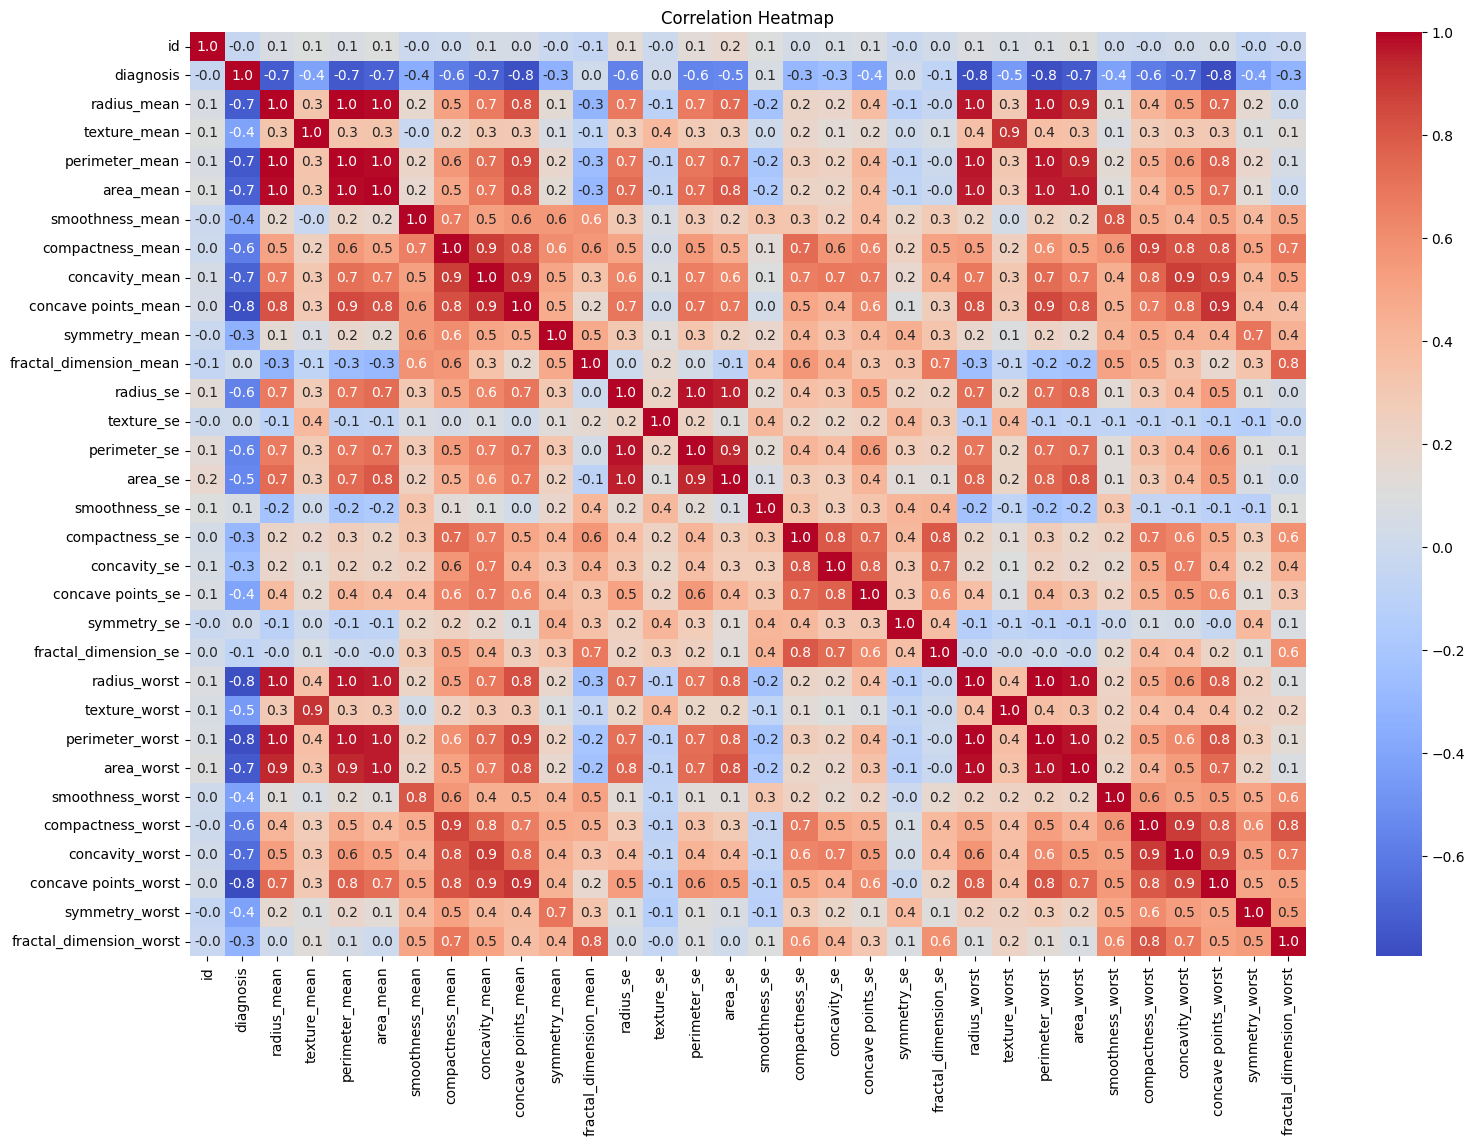

In [9]:
print("Generating Correlation Heatmap...")
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()


Generating Count Plots for Top Categorical Features...
Generating Pairplot for Top 5 Numerical Features...


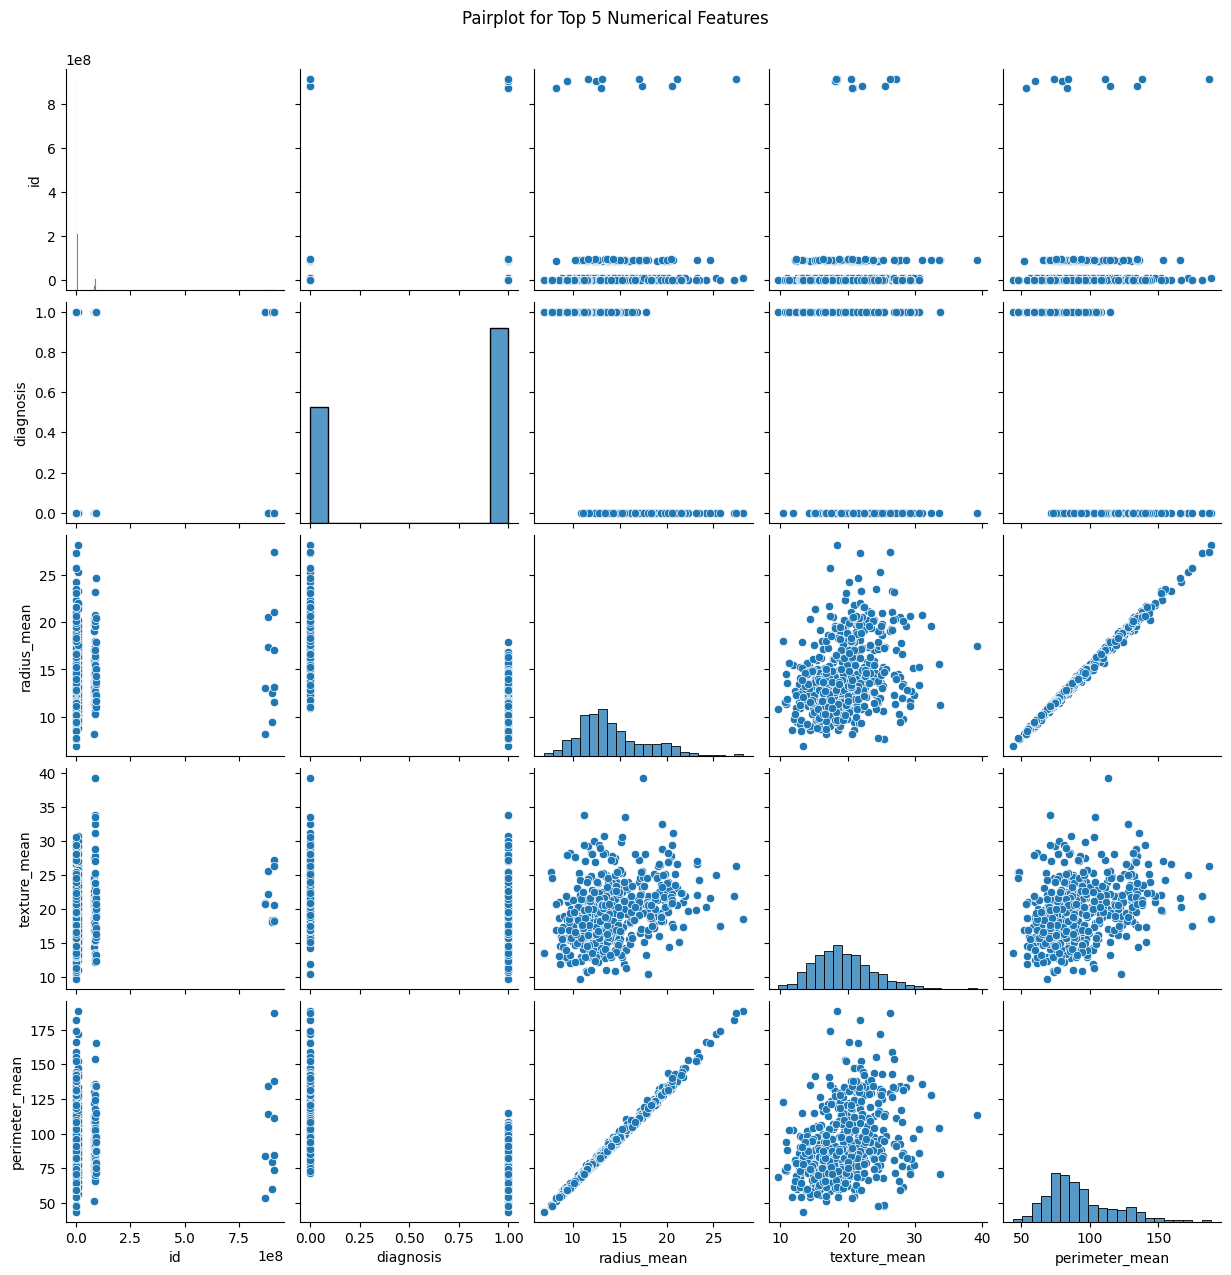

In [10]:
# Count plot for categorical columns (Top 5)
print("Generating Count Plots for Top Categorical Features...")
categorical_columns = df.select_dtypes(include=['object']).columns[:5]
for col in categorical_columns:
    plt.figure(figsize=(4, 4))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{col}_countplot.png")
    plt.show()

# Pairplot for Numerical Features (Top 5)
print("Generating Pairplot for Top 5 Numerical Features...")
top_numerical = df.select_dtypes(include=['number']).columns[:5]
sns.pairplot(df[top_numerical])
plt.suptitle("Pairplot for Top 5 Numerical Features", y=1.02)
plt.savefig("pairplot.png")
plt.show()

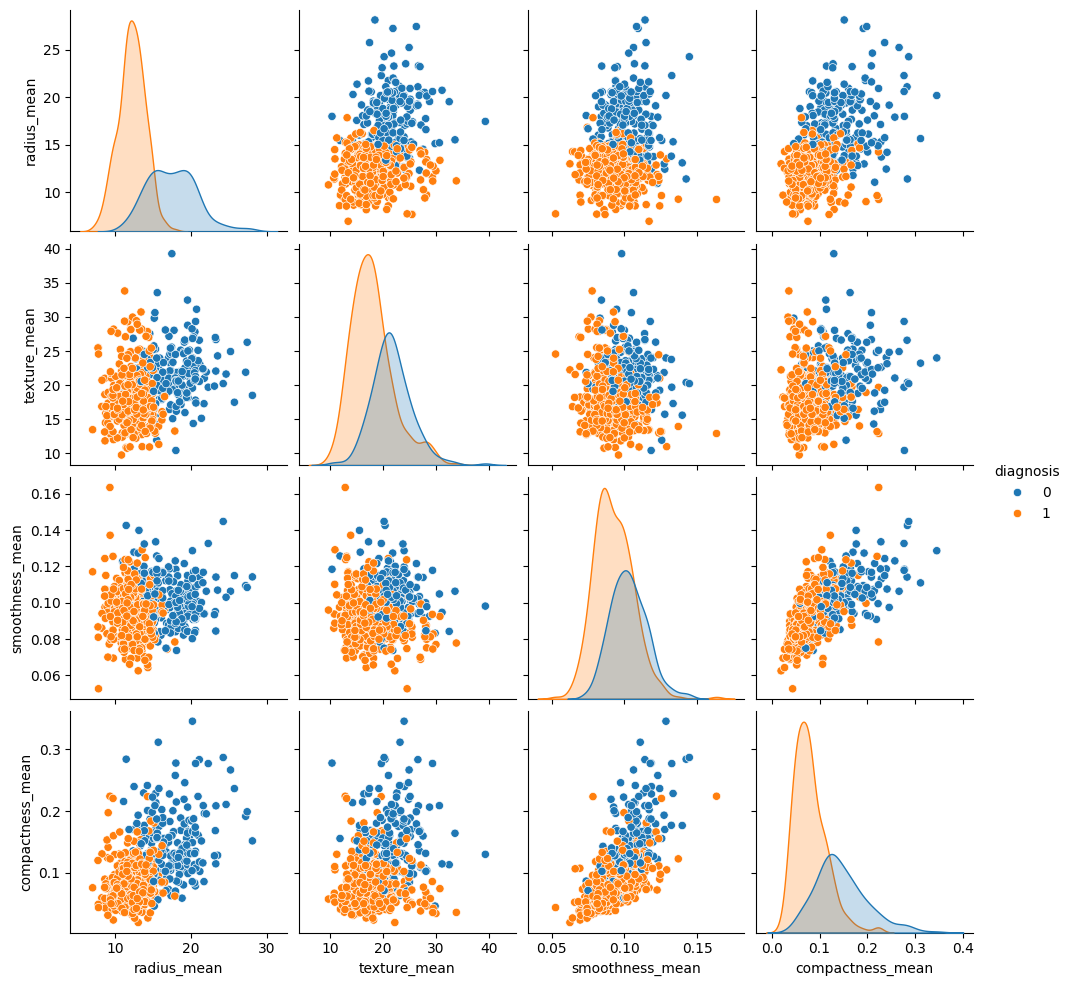

In [11]:
# Pairplot of selected features
selected_features = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis', diag_kind="kde")
plt.show()

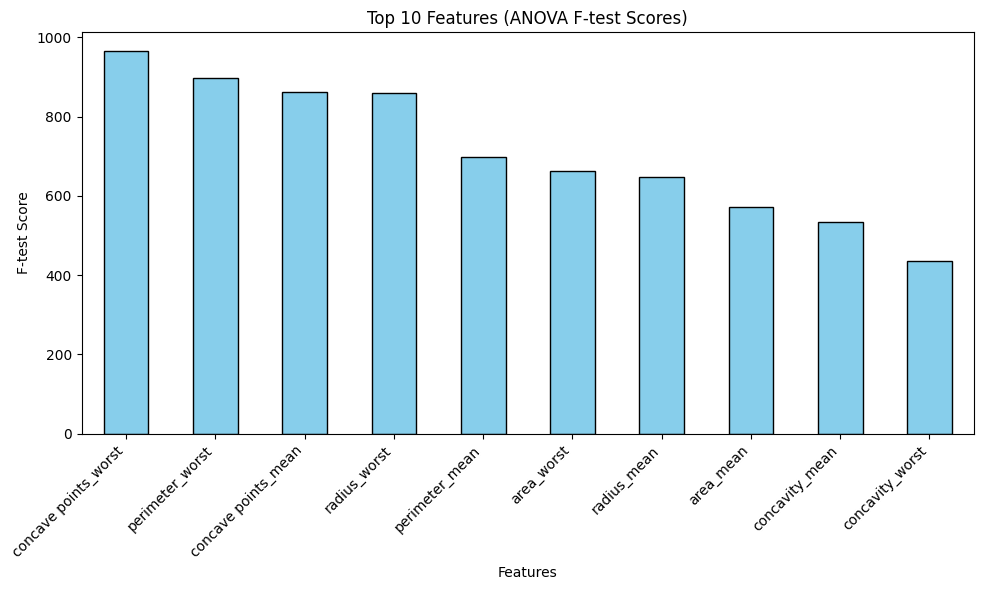

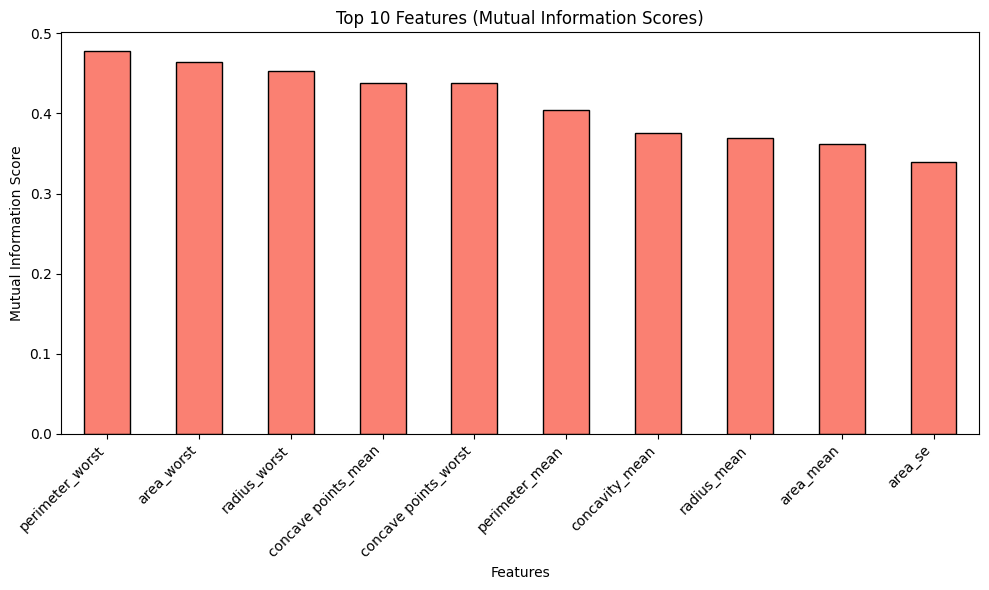


Performing Data Transformations...

Standardized Numerical Features (First 5 rows):
         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0 -0.236405     1.097064     -2.073335        1.269934   0.984375   
1 -0.236403     1.829821     -0.353632        1.685955   1.908708   
2  0.431741     1.579888      0.456187        1.566503   1.558884   
3  0.432121    -0.768909      0.253732       -0.592687  -0.764464   
4  0.432201     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  radius_worst  

In [12]:
### Feature Selection
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split


X = df.drop(columns=['diagnosis'])  # Features (all columns except the target)
y = df['diagnosis']                # Target column

# Feature selection
X = df.drop(columns=['diagnosis'])  # Features
y = df['diagnosis']  # Target

# Select the top K features using ANOVA F-test
k = 10  # Number of top features to select
selector_anova = SelectKBest(score_func=f_classif, k=k)
X_selected_anova = selector_anova.fit_transform(X, y)

# Get ANOVA scores and feature names
anova_scores = selector_anova.scores_
anova_selected_features = X.columns[selector_anova.get_support()]

# Mutual Information for Feature Importance
mutual_info = mutual_info_classif(X, y)
mutual_info_selected_features = pd.Series(mutual_info, index=X.columns)

# Create bar plots for top 10 features based on ANOVA F-test and Mutual Information
anova_top_features = pd.Series(anova_scores, index=X.columns).sort_values(ascending=False).head(10)
mutual_info_top_features = mutual_info_selected_features.sort_values(ascending=False).head(10)

# Plot ANOVA F-test scores
plt.figure(figsize=(10, 6))
anova_top_features.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Features (ANOVA F-test Scores)')
plt.ylabel('F-test Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Mutual Information scores
plt.figure(figsize=(10, 6))
mutual_info_top_features.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 10 Features (Mutual Information Scores)')
plt.ylabel('Mutual Information Score')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ---------------------------------------------
# c) Data Transforms
# ---------------------------------------------
print("\nPerforming Data Transformations...")

# Scaling numerical features
scaler = StandardScaler()  # For standardization
X_scaled = scaler.fit_transform(X.select_dtypes(include=np.number))

# Min-Max Scaling (Uncomment to use Min-Max)
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X.select_dtypes(include=np.number))

# Convert back to DataFrame
X_transformed = pd.DataFrame(X_scaled, columns=X.select_dtypes(include=np.number).columns)
print("\nStandardized Numerical Features (First 5 rows):")
print(X_transformed.head())

# Encode categorical features using LabelEncoder
categorical_columns = X.select_dtypes(include='object').columns
for col in categorical_columns:
    le = LabelEncoder()
    X_transformed[col] = le.fit_transform(X[col])

print("\nTransformed Dataset (Numerical + Encoded Categorical Features):")
print(X_transformed.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
print("\nDataset successfully split into training and testing sets.")


In [13]:

# Verify the shapes of the splits
print("Shapes of Train and Test sets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")



Shapes of Train and Test sets:
X_train: (455, 31), X_test: (114, 31)
y_train: (455,), y_test: (114,)


Training Logistic Regression...
Logistic Regression Metrics:
Accuracy: 0.9737
Precision: 0.9742, Recall: 0.9697, F1 Score: 0.9719
FDR: 0.0278, FNR: 0.0141, TNR: 0.9535
Confusion Matrix:
[[41  2]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Training KNN...
KNN Metrics:
Accuracy: 0.9474
Precision: 0.9440, Recall: 0.9440, F1 Score: 0.9440
FDR: 0.0423, FNR: 0.0423, TNR: 0.9302
Confusion Matrix:
[[40  3]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:27:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Metrics:
Accuracy: 0.9561
Precision: 0.9554, Recall: 0.9510, F1 Score: 0.9531
FDR: 0.0417, FNR: 0.0282, TNR: 0.9302
Confusion Matrix:
[[40  3]
 [ 2 69]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Training AdaBoost...
AdaBoost Metrics:
Accuracy: 0.9649
Precision: 0.9627, Recall: 0.9627, F1 Score: 0.9627
FDR: 0.0282, FNR: 0.0282, TNR: 0.9535
Confusion Matrix:
[[41  2]
 [ 2 69]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



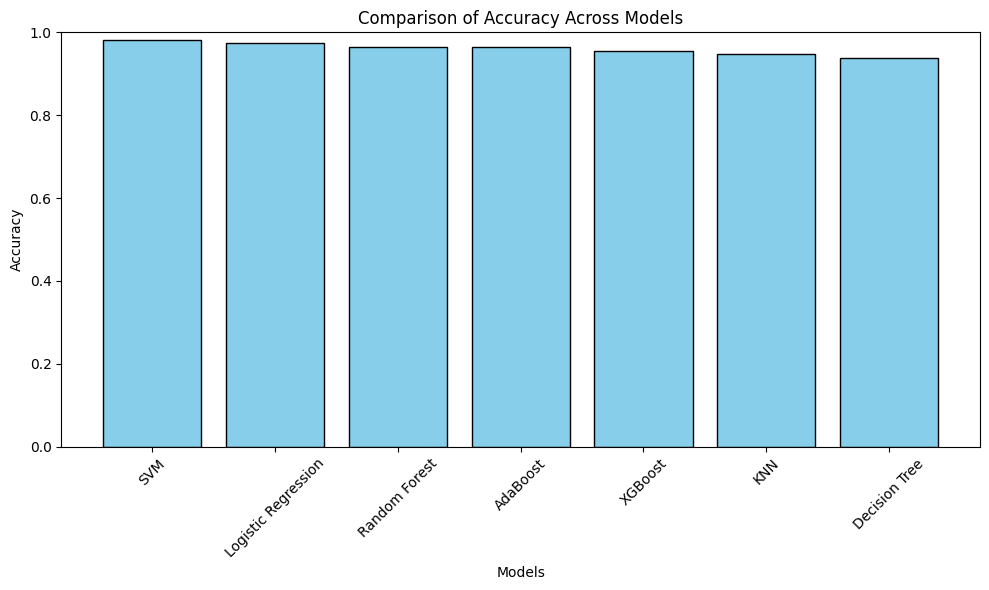

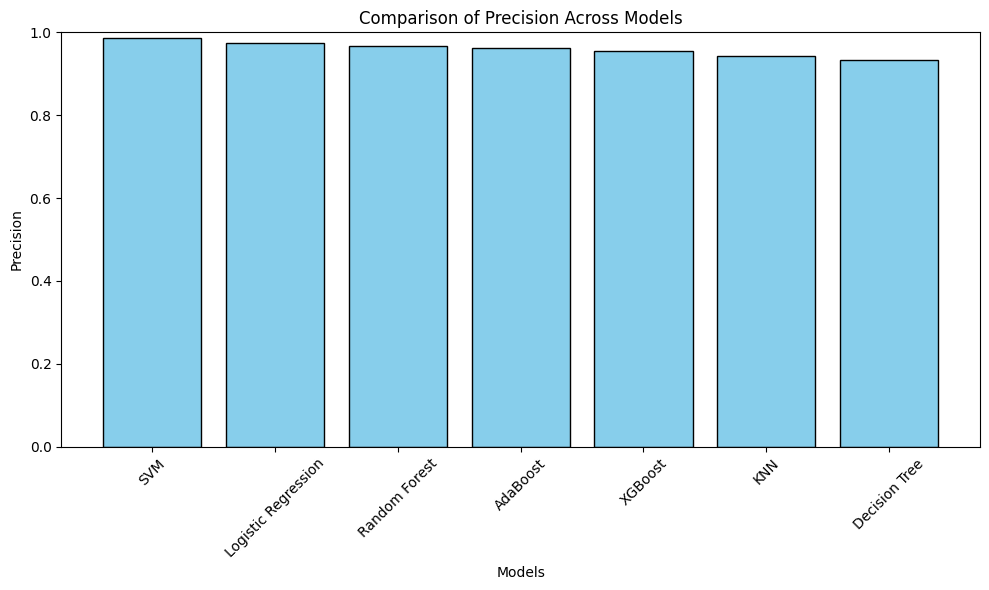

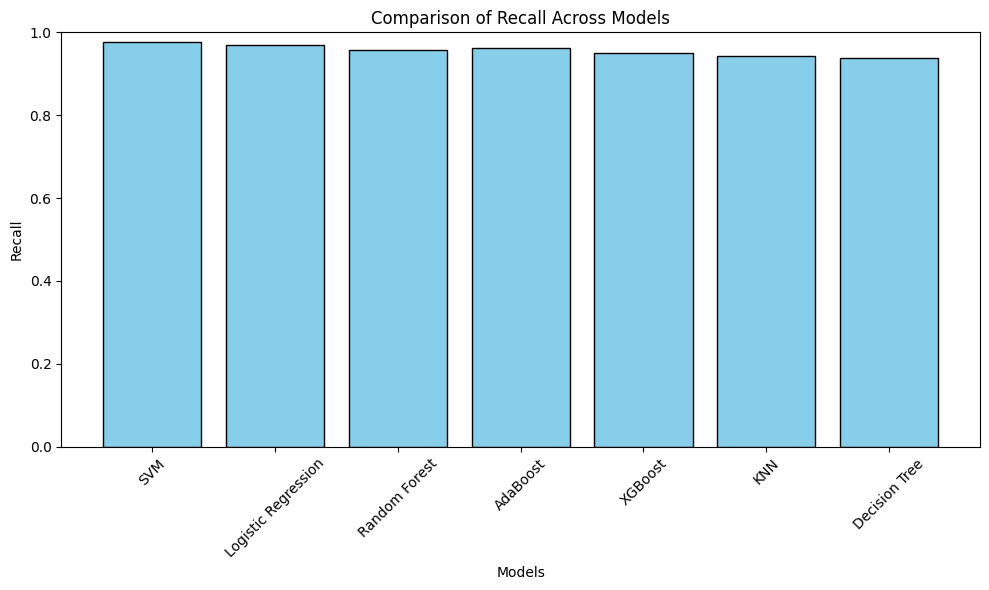

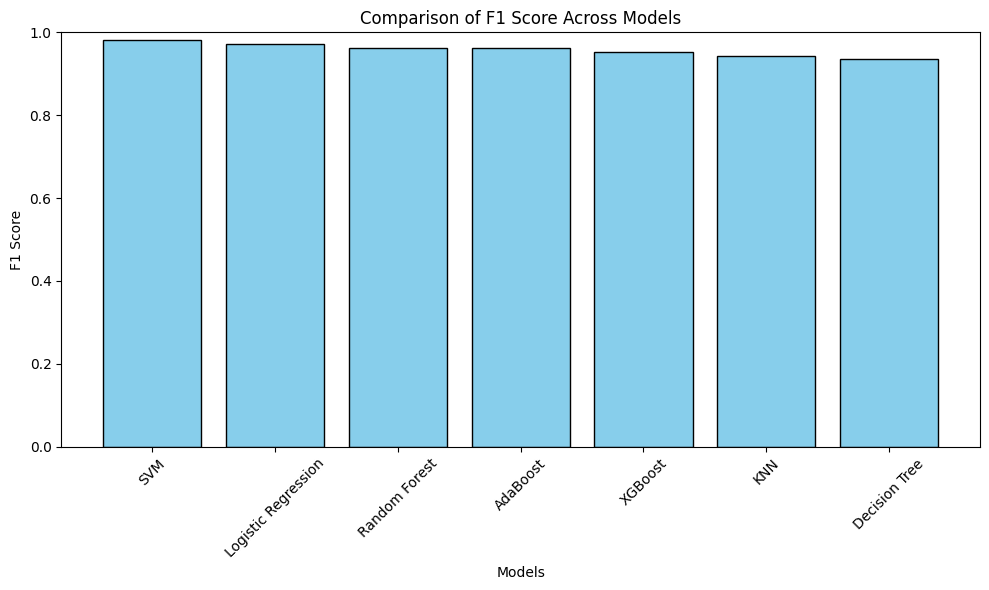

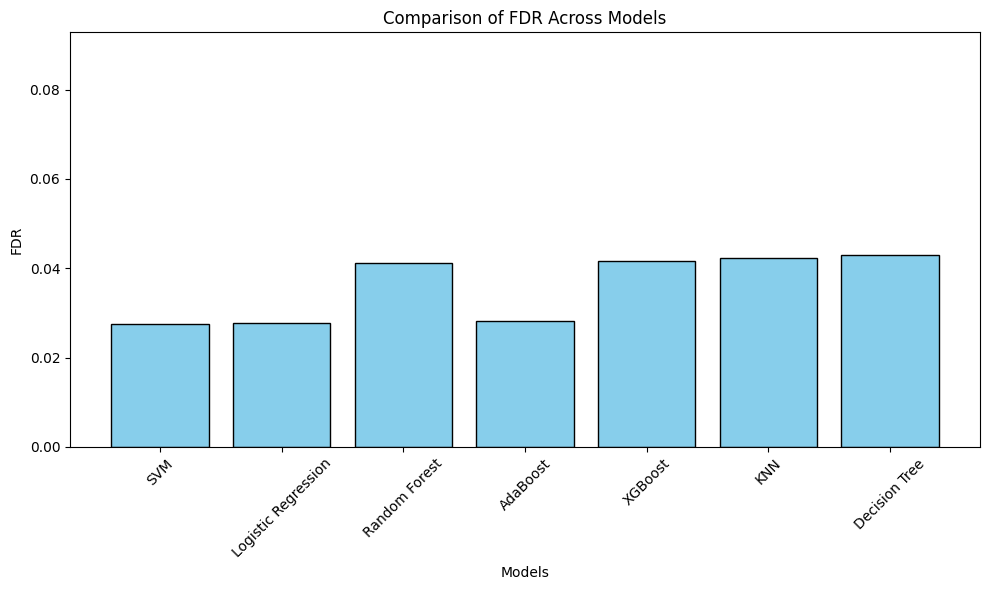

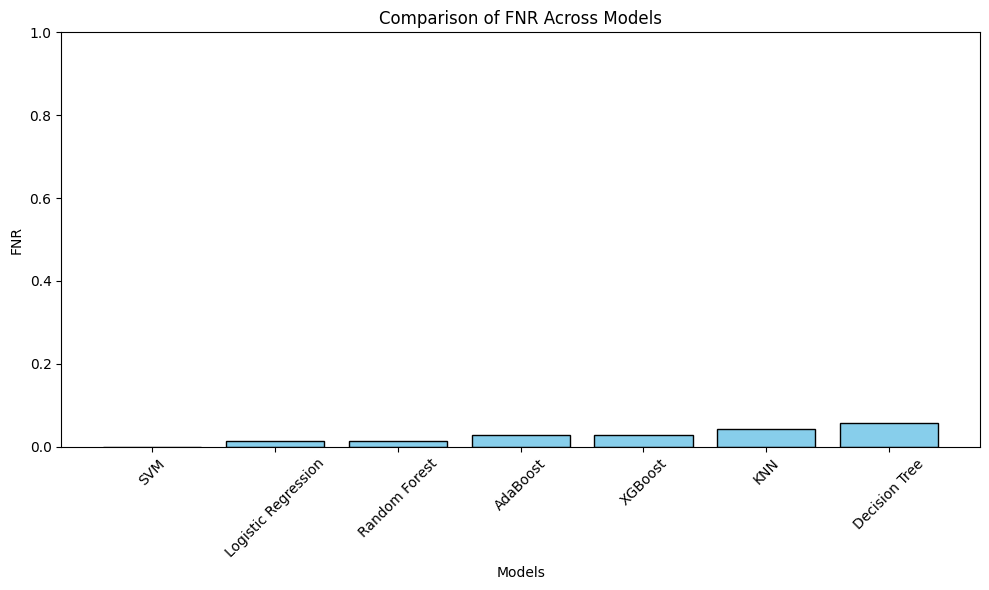

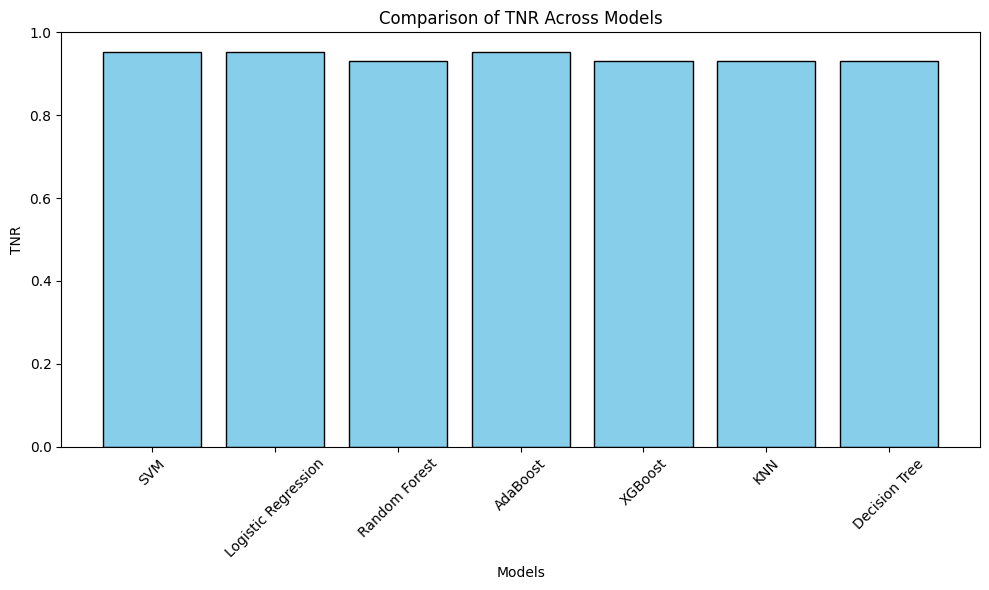

,Model,Accuracy,Precision,Recall,F1 Score,FDR,FNR,TNR
4,SVM,0.982456,0.986301,0.976744,0.981151,0.027397,0.000000,0.953488
0,Logistic Regression,0.973684,0.974206,0.969702,0.971863,0.027778,0.014085,0.953488
2,Random Forest,0.964912,0.967257,0.958074,0.962302,0.041096,0.014085,0.930233
6,AdaBoost,0.964912,0.962660,0.962660,0.962660,0.028169,0.028169,0.953488
5,XGBoost,0.956140,0.955357,0.951032,0.953106,0.041667,0.028169,0.930233
1,KNN,0.947368,0.943990,0.943990,0.943990,0.042254,0.042254,0.930233
3,Decision Tree,0.938596,0.933117,0.936947,0.934947,0.042857,0.056338,0.930233


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import pandas as pd

# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42, probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
}

# Metrics dictionary to store the results
metrics = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)

    # Compute confusion matrix components
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel() if cm.size == 4 else (0, 0, 0, 0)

    # Compute rates
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')
    fdr = FP / (FP + TP) if (FP + TP) > 0 else 0  # False Discovery Rate
    fnr = FN / (FN + TP) if (FN + TP) > 0 else 0  # False Negative Rate
    tnr = TN / (TN + FP) if (TN + FP) > 0 else 0  # True Negative Rate

    # Append results
    metrics.append({
        "Model": model_name,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "FDR": fdr,
        "FNR": fnr,
        "TNR": tnr
    })

    # Print metrics for each model
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
    print(f"FDR: {fdr:.4f}, FNR: {fnr:.4f}, TNR: {tnr:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(classification_report(y_test, y_pred))

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics).sort_values(by="Accuracy", ascending=False)

# Plot bar diagrams for all metrics
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1 Score", "FDR", "FNR", "TNR"]
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 6))
    plt.bar(metrics_df['Model'], metrics_df[metric], color='skyblue', edgecolor='black')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} Across Models')
    plt.xticks(rotation=45)
    plt.ylim(0, 1 if metric != "FDR" else max(metrics_df[metric]) + 0.05)
    plt.tight_layout()
    plt.show()

# Display the summary DataFrame
metrics_df


In [29]:
from pycaret.classification import setup, compare_models, predict_model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Split data into features (X) and target (y)
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

# Combine X and y into a single DataFrame for PyCaret
data = pd.concat([X, y], axis=1)
data.columns = [f'feature_{i}' for i in range(X.shape[1])] + ['target']  # Rename columns for PyCaret

# Step 1: Initialize PyCaret
clf_setup = setup(data=data, target='target', session_id=42,  verbose=False)

# Step 2: Compare models and select the best one
best_model = compare_models()

# Step 3: Split into train/test for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test_data = pd.concat([X_test, y_test], axis=1)
test_data.columns = [f'feature_{i}' for i in range(X_test.shape[1])] + ['target']





,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9725,0.9863,0.9800,0.9767,0.9781,0.9411,0.9419,0.3210
et,Extra Trees Classifier,0.9725,0.9916,0.9760,0.9800,0.9778,0.9417,0.9423,0.1750
ada,Ada Boost Classifier,0.9724,0.9885,0.9880,0.9696,0.9784,0.9403,0.9418,0.3330
xgboost,Extreme Gradient Boosting,0.9599,0.9880,0.9720,0.9648,0.9679,0.9145,0.9163,0.1200
lightgbm,Light Gradient Boosting Machine,0.9599,0.9874,0.9760,0.9612,0.9682,0.9137,0.9151,0.7200
gbc,Gradient Boosting Classifier,0.9575,0.9872,0.9720,0.9610,0.9661,0.9091,0.9104,0.5140
lda,Linear Discriminant Analysis,0.9573,0.9896,0.9960,0.9414,0.9675,0.9056,0.9106,0.0360
ridge,Ridge Classifier,0.9499,0.9933,0.9920,0.9333,0.9615,0.8901,0.8946,0.0400
qda,Quadratic Discriminant Analysis,0.9499,0.9877,0.9520,0.9679,0.9592,0.8943,0.8964,0.0590
dt,Decision Tree Classifier,0.9425,0.9367,0.9600,0.9491,0.9540,0.8772,0.8789,0.0610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Evaluating Random Forest pipeline...
Random Forest Cross-Validation Accuracy: 0.9578
Evaluating KNN pipeline...
KNN Cross-Validation Accuracy: 0.9648
Evaluating Logistic Regression pipeline...
Logistic Regression Cross-Validation Accuracy: 0.9789
Evaluating AdaBoost pipeline...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost Cross-Validation Accuracy: 0.9666
Evaluating Decision Tree pipeline...
Decision Tree Cross-Validation Accuracy: 0.9156
Evaluating SVM pipeline...
SVM Cross-Validation Accuracy: 0.9719
Evaluating XGBoost pipeline...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Cross-Validation Accuracy: 0.9719
Pipeline Model Performance Summary:
                 Model  Cross-Val Accuracy
2  Logistic Regression            0.978932
6              XGBoost            0.971899
5                  SVM            0.971883
3             AdaBoost            0.966620
1                  KNN            0.964835
0        Random Forest            0.957848
4        Decision Tree            0.915603


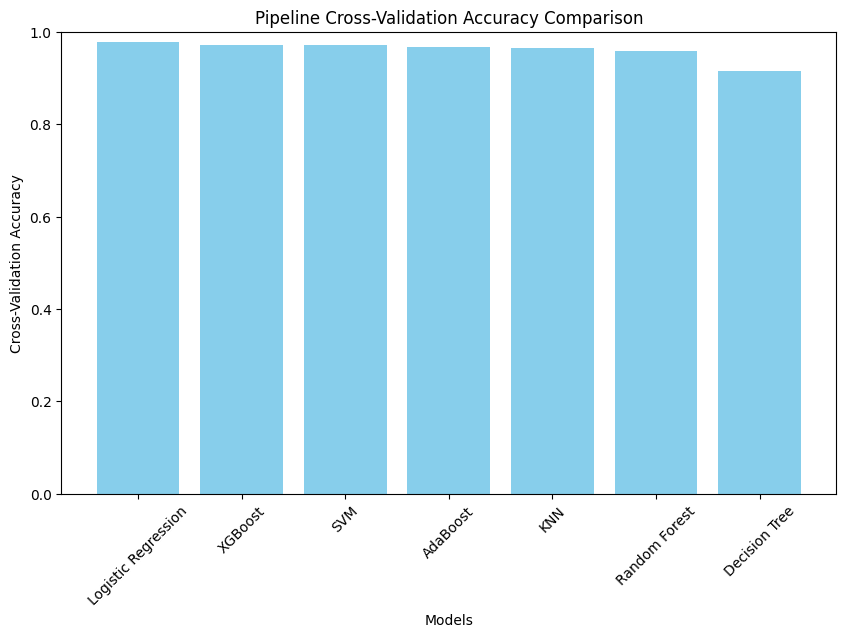

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define models for pipeline
pipelines = {
    "Random Forest": Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    "KNN": Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ]),
    "Logistic Regression": Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),
    "AdaBoost": Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', AdaBoostClassifier(random_state=42))
    ]),
    "Decision Tree": Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    "SVM": Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', SVC(kernel='rbf', random_state=42))
    ]),
    "XGBoost": Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
    ])
}

# Cross-validation for each pipeline
pipeline_results = []
for model_name, pipeline in pipelines.items():
    print(f"Evaluating {model_name} pipeline...")
    scores = cross_val_score(pipeline, X, y.values.ravel(), cv=5, scoring='accuracy')
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f}")
    pipeline_results.append({"Model": model_name, "Cross-Val Accuracy": scores.mean()})

# Display results as a DataFrame
pipeline_results_df = pd.DataFrame(pipeline_results).sort_values(by="Cross-Val Accuracy", ascending=False)
print("Pipeline Model Performance Summary:")
print(pipeline_results_df)

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(pipeline_results_df['Model'], pipeline_results_df['Cross-Val Accuracy'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Pipeline Cross-Validation Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


Training Random Forest on full training data...
Random Forest Accuracy on Test Set: 0.9649
Training KNN on full training data...
KNN Accuracy on Test Set: 0.9474
Training Logistic Regression on full training data...
Logistic Regression Accuracy on Test Set: 0.9737
Training AdaBoost on full training data...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy on Test Set: 0.9474
Training Decision Tree on full training data...
Decision Tree Accuracy on Test Set: 0.9386
Training SVM on full training data...
SVM Accuracy on Test Set: 0.9825
Training XGBoost on full training data...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:48:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy on Test Set: 0.9561

Best-Performing Model: SVM
Test Accuracy: 0.9825

Confusion Matrix:
[[41  2]
 [ 0 71]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



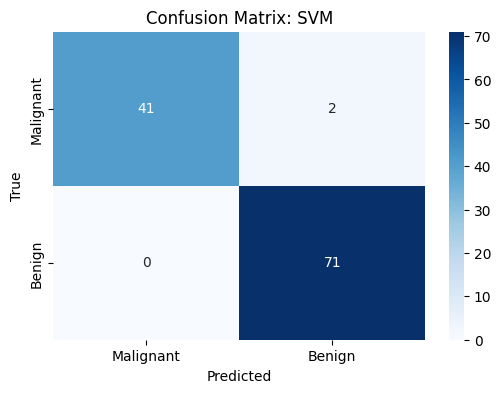


Test Set Performance Summary:
                 Model  Test Accuracy
5                  SVM       0.982456
2  Logistic Regression       0.973684
0        Random Forest       0.964912
6              XGBoost       0.956140
1                  KNN       0.947368
3             AdaBoost       0.947368
4        Decision Tree       0.938596


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Train-test split already performed earlier (X_train_scaled, X_test_scaled, y_train, y_test)

# Train and evaluate all models on the test set to select the best-performing model
best_model_name = None
best_model = None
best_accuracy = 0
results_test = []

for model_name, pipeline in pipelines.items():
    print(f"Training {model_name} on full training data...")
    pipeline.fit(X_train, y_train.values.ravel())
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy on Test Set: {acc:.4f}")

    # Save the best model
    if acc > best_accuracy:
        best_model_name = model_name
        best_model = pipeline
        best_accuracy = acc

    # Store results for comparison
    results_test.append({"Model": model_name, "Test Accuracy": acc})

# Evaluate the best-performing model
print(f"\nBest-Performing Model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.4f}")

# Predict using the best model
y_pred_best = best_model.predict(X_test)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred_best)
class_report = classification_report(y_test, y_pred_best)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.title(f"Confusion Matrix: {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Summary of test results
results_test_df = pd.DataFrame(results_test).sort_values(by="Test Accuracy", ascending=False)
print("\nTest Set Performance Summary:")
print(results_test_df)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

# Ensemble Voting Classifier
ensemble_model = VotingClassifier(estimators=[
    ('lr', LogisticRegression(random_state=42, max_iter=1000)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42))
], voting='soft')  # Soft voting for probabilities

# Train the ensemble model
ensemble_model.fit(X_train, y_train)


# ---------------------------------------------
# Finalize Model and Validate
# ---------------------------------------------
print("\nFinalizing the Best Model on Validation Set...")

# Validate individual models
print("\nValidation Accuracy for Individual Models:")
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name}: Validation Accuracy = {acc:.4f}")

# Validate the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"\nEnsemble Model Validation Accuracy: {ensemble_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:53:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Finalizing the Best Model on Validation Set...

Validation Accuracy for Individual Models:
Logistic Regression: Validation Accuracy = 0.9737
KNN: Validation Accuracy = 0.9474
Random Forest: Validation Accuracy = 0.9649
Decision Tree: Validation Accuracy = 0.9386
SVM: Validation Accuracy = 0.9825


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:53:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Validation Accuracy = 0.9561


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost: Validation Accuracy = 0.9474

Ensemble Model Validation Accuracy: 0.9649


In [ ]:
# Predictions on New Validation Dataset
# ---------------------------------------------
print("\nMaking Predictions on Validation Dataset...")

# Predict probabilities for the validation dataset
y_pred_probabilities = ensemble_model.predict_proba(X_test)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(y_pred_probabilities, columns=[f"Class_{i}" for i in range(len(set(y)))])
predictions_df['Predicted_Class'] = ensemble_model.predict(X_test)

# Display predictions
print("\nPredictions on Validation Dataset:")
print(predictions_df.head())


Making Predictions on Validation Dataset...

Predictions on Validation Dataset:
    Class_0   Class_1  Predicted_Class
0  0.162938  0.837062                1
1  0.939919  0.060081                0
2  0.906010  0.093990                0
3  0.092670  0.907330                1
4  0.044606  0.955394                1
